In [1]:
import pandas as pd
import numpy as np

# load data ----
train_df = pd.read_csv('data/train_data_lemma.csv')
train_df = train_df[train_df['review_text'].str.split().str.len()>=1]
# assign x and y
X_train = train_df.drop(columns = ['classification'])
y_train = train_df[['classification']]
# flatten y
y_train = y_train.values.ravel()
# encode variables (minority class = 1)
y_train = np.where(y_train=='Negative', 1, 0)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("lr", LogisticRegression(random_state = 1, max_iter=500)),
    ]
)

parameters = {
    "vect__ngram_range": ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    "lr__C": (0.001, 0.01, 0.1, 1, 10),
}

lr_grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=0, scoring='f1')
lr_grid.fit(X_train.review_text, y_train)

print("Best score: %0.3f" % lr_grid.best_score_)
print("Best parameters:")
lr_grid.best_params_

Best score: 0.839
Best parameters:


{'lr__C': 10,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 2)}

In [3]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("nb", MultinomialNB())
    ]
)

parameters = {
    "vect__ngram_range": ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    "nb__alpha": (0.001, 0.01, 0.1, 1, 10)
}

nb_grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=0, scoring='f1')
nb_grid.fit(X_train.review_text, y_train)

print("Best score: %0.3f" % nb_grid.best_score_)
print("Best parameters:")
nb_grid.best_params_

Best score: 0.837
Best parameters:


{'nb__alpha': 0.1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 2)}

In [4]:
from sklearn.svm import SVC

pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("svm", SVC(random_state = 1, kernel = 'linear'))
    ]
)

parameters = {
    "vect__ngram_range": ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
     "svm__C": (0.001, 0.01, 0.1, 1, 10)
}

svm_grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
svm_grid.fit(X_train.review_text, y_train)

print("Best score: %0.3f" % svm_grid.best_score_)
print("Best parameters:")
svm_grid.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best score: 0.841
Best parameters:


{'svm__C': 1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 2)}

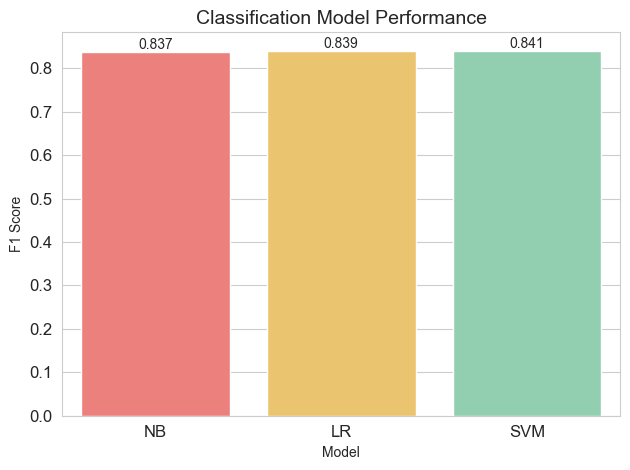

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot model performance
sns.set_style('whitegrid')
ax = sns.barplot(
    data=pd.DataFrame([['NB', nb_grid.best_score_], ['LR', lr_grid.best_score_], ['SVM', svm_grid.best_score_]],columns=['Model','F1 Score']),
    x="Model",
    y='F1 Score',
    palette=["#FF6F69","#ffcc5c","#88D8B0"])

ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title('Classification Model Performance',fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show();


In [6]:
# store trained models
import pickle
pickle.dump(nb_grid.best_estimator_, open("data/nb_trained.sav", 'wb'))
pickle.dump(lr_grid.best_estimator_, open("data/lr_trained.sav", 'wb'))
pickle.dump(svm_grid.best_estimator_, open("data/svm_trained.sav", 'wb'))